Program Assignment 1 Machine Learning
2023-2024 odd
Create a machine-learning model based on the dataset that has been assigned to you.
You can choose either regression or classification problems on the given dataset. Your
jupyter notebook submission should include:
1. Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.
2. Data Preprocessing (10 points): Explain what are the preprocessing techniques
that you apply and why you need these techniques
3. Data Analysis (10 points): Explain your understanding of the data pattern. You
can explain the insight that you get from the data
4. Model Generation (30 points): Create your model and describe the algorithm
that you use. Explain why you chose this model
5. Model Evaluation (20 points): Explain the results of your model

Marsha Alexis Likorawung 0706012110034

Evelyn Callista Yaurentius 0706012110036

# 1. Problem and Task Understanding (30 points): 
Explain the problem you want to solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.


Problem and Task Understanding : The problem we want to solve is to predict weather the customer going to churn or not. This problems treated as a classification problem because : 

1. The outcome is binary: which is either the customer churn (Yes/No)
2. Classification algorithm are designed to handle categorical or discrete outcome such as predicting classes or labels
3. The model selection for machine learning would be logistic regression. Logistic prediction is used to predict the dependent variable. We also use knn and random forest to compare with logistic regression, to see which model algorithm is better based on the accuracy score, f1 score and log loss score

# Load Dataset Customer Churn

Load Data

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data, from marsha's github (the csv file is imported to github for easier and online access to the dataset)
url = "https://raw.githubusercontent.com/Marsh16/customer-churn/main/Customer%20Churn%20-%20Dataset.csv"
data = pd.read_csv(url)

#show all columns 
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Info

In [314]:
#this is the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Description

In [315]:
#this is the data describe
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Pre-Processing Data

In [316]:
# check empty data 
(data == ' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [317]:
#check duplicate data
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [318]:
#for null('')/empty data will be dropped/deleted
for i in range(len(data['TotalCharges'])):
    if data['TotalCharges'][i] == ' ':
        data=data.drop(i)

In [319]:
#recheck data deleted or not 
(data == ' ').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [320]:
#check data with value 0, only senior citizen because its column already with 0 and 1 format
(data == 0).sum()

customerID             0
gender                 0
SeniorCitizen       5890
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [321]:
from sklearn.preprocessing import LabelEncoder
label_encoder2 = LabelEncoder()

data['gender'] = label_encoder2.fit_transform(data['gender'])
data['SeniorCitizen'] = label_encoder2.fit_transform(data['SeniorCitizen'])
data['Partner'] = label_encoder2.fit_transform(data['Partner'])
data['Dependents'] = label_encoder2.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder2.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder2.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder2.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder2.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder2.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder2.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder2.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder2.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder2.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder2.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder2.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder2.fit_transform(data['PaymentMethod']) 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['Churn'] = label_encoder2.fit_transform(data['Churn']) 
                                                                
# Show the plots
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [322]:
#recheck data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [323]:
#recheck data describe
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [324]:
#drop customerID, is not relevan with churn or not churn 
data.drop('customerID', inplace=True, axis=1) 
(data == 0).sum()

gender              3483
SeniorCitizen       5890
Partner             3639
Dependents          4933
tenure                 0
PhoneService         680
MultipleLines       3385
InternetService     2416
OnlineSecurity      3497
OnlineBackup        3087
DeviceProtection    3094
TechSupport         3472
StreamingTV         2809
StreamingMovies     2781
Contract            3875
PaperlessBilling    2864
PaymentMethod       1542
MonthlyCharges         0
TotalCharges           0
Churn               5163
dtype: int64

In [325]:
# separate a dataset into independent variables (X) and dependent variable (y) using the loc method
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [326]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [327]:
# If your dataset has outliers, you might consider using a more robust scaler, such as RobustScaler, which is available in scikit-learn. The RobustScaler uses the median and the interquartile range (IQR) to scale features, making it less sensitive to outliers.
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_trainsc = sc.fit_transform(X_train)
X_testsc = sc.transform (X_test)

In [328]:
# Normalisation data with StandardScaler for random forest
#If you're using an algorithm that doesn't rely on distances (like Decision Trees, Random Forests), either scaler can be used. 
# MinMaxScaler might be a good choice if you want to explicitly scale features to a specific range.
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_trainrf = minmax.fit_transform(X_train)
X_testrf = minmax.transform (X_test)

# 3. Data Analysis (10 points): 
Explain your understanding of the data pattern. You can explain the insight that you get from the data



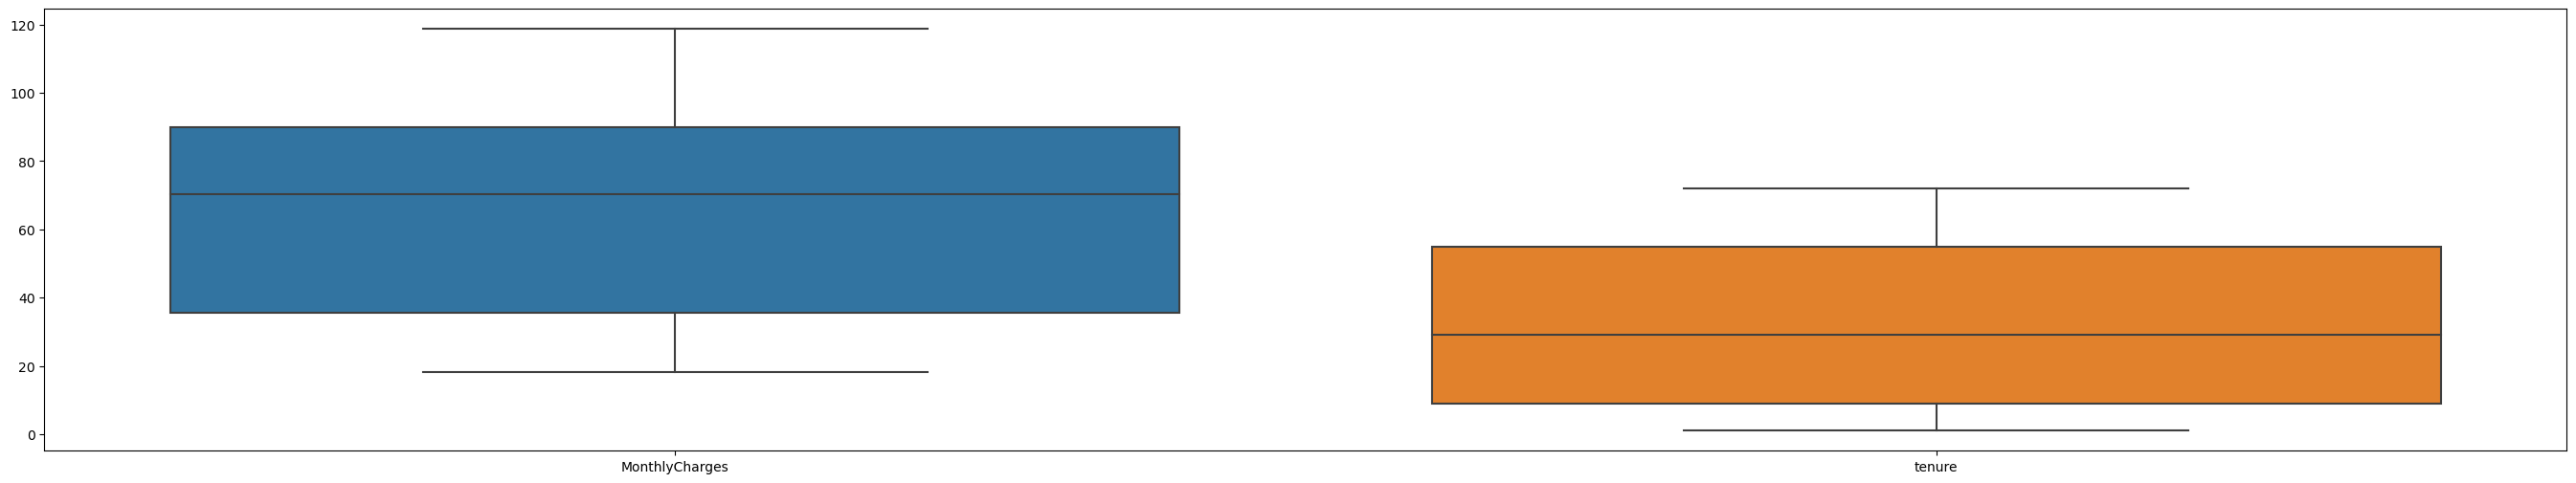

In [329]:
# Fit and transform the categorical data, montly charges and tenure
plt.figure(figsize=(34, 6))
sns.boxplot(data=data[['MonthlyCharges','tenure']])
plt.show()

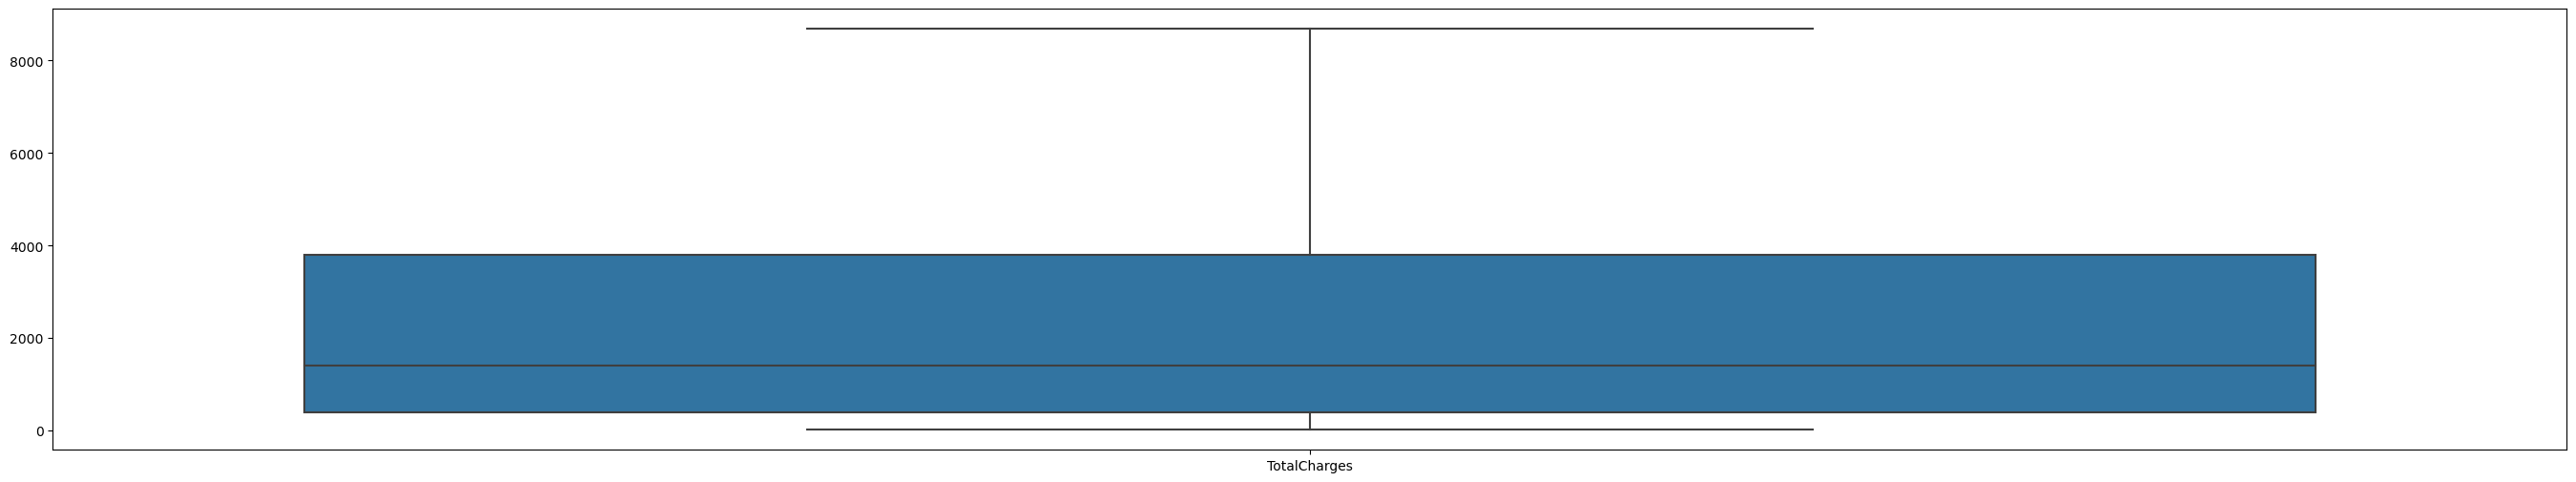

In [330]:
# Fit and transform the categorical data, total charges
plt.figure(figsize=(34, 6))
sns.boxplot(data=data[['TotalCharges']])
plt.show()

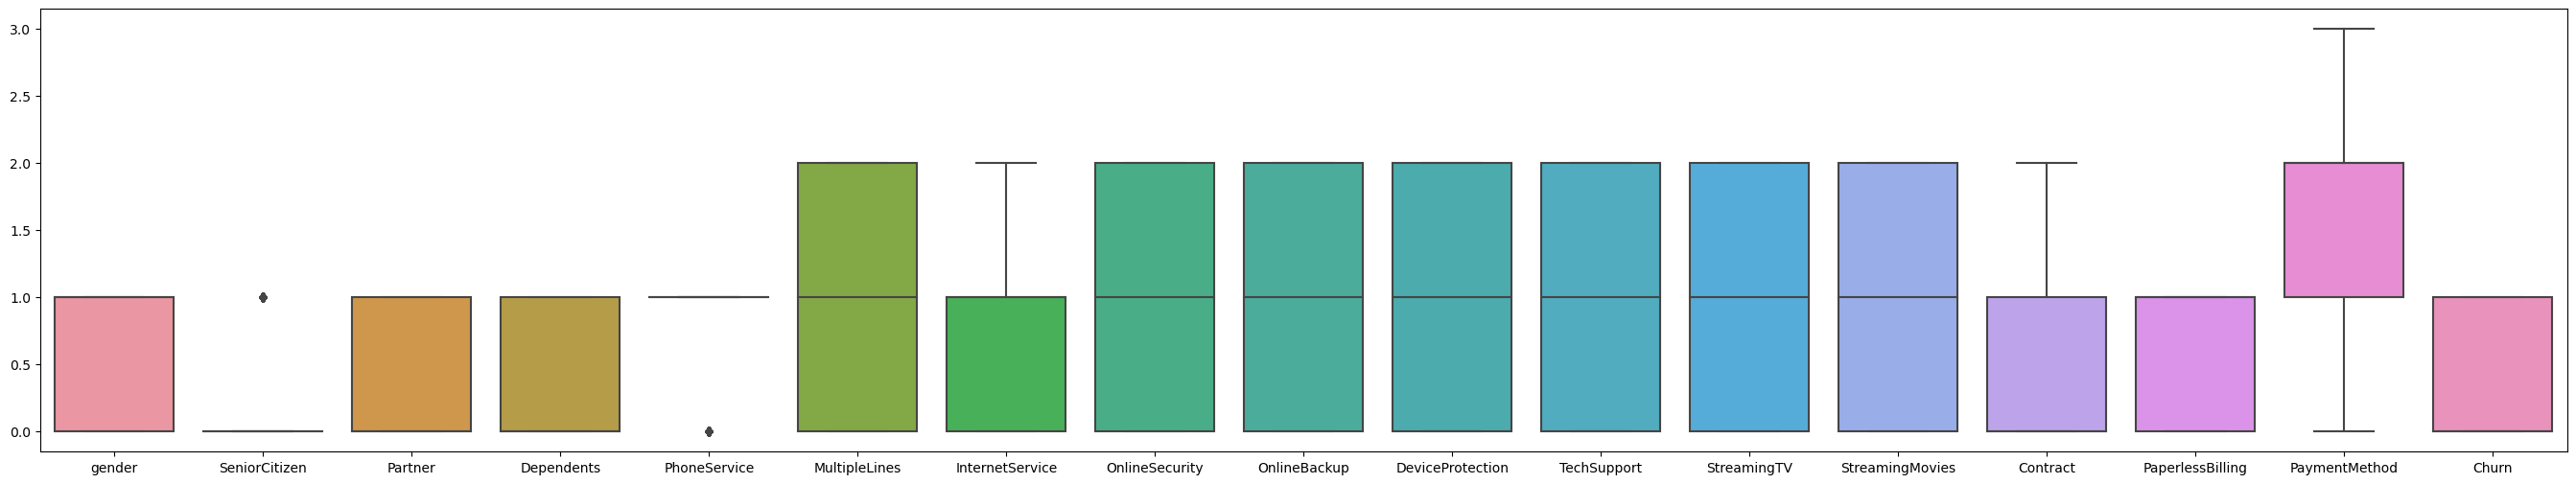

In [331]:
# Fit and transform the categorical data, OTHER DATA
plt.figure(figsize=(34, 6))
sns.boxplot(data=data[['gender','SeniorCitizen', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']])
plt.show()

<Figure size 1200x800 with 0 Axes>

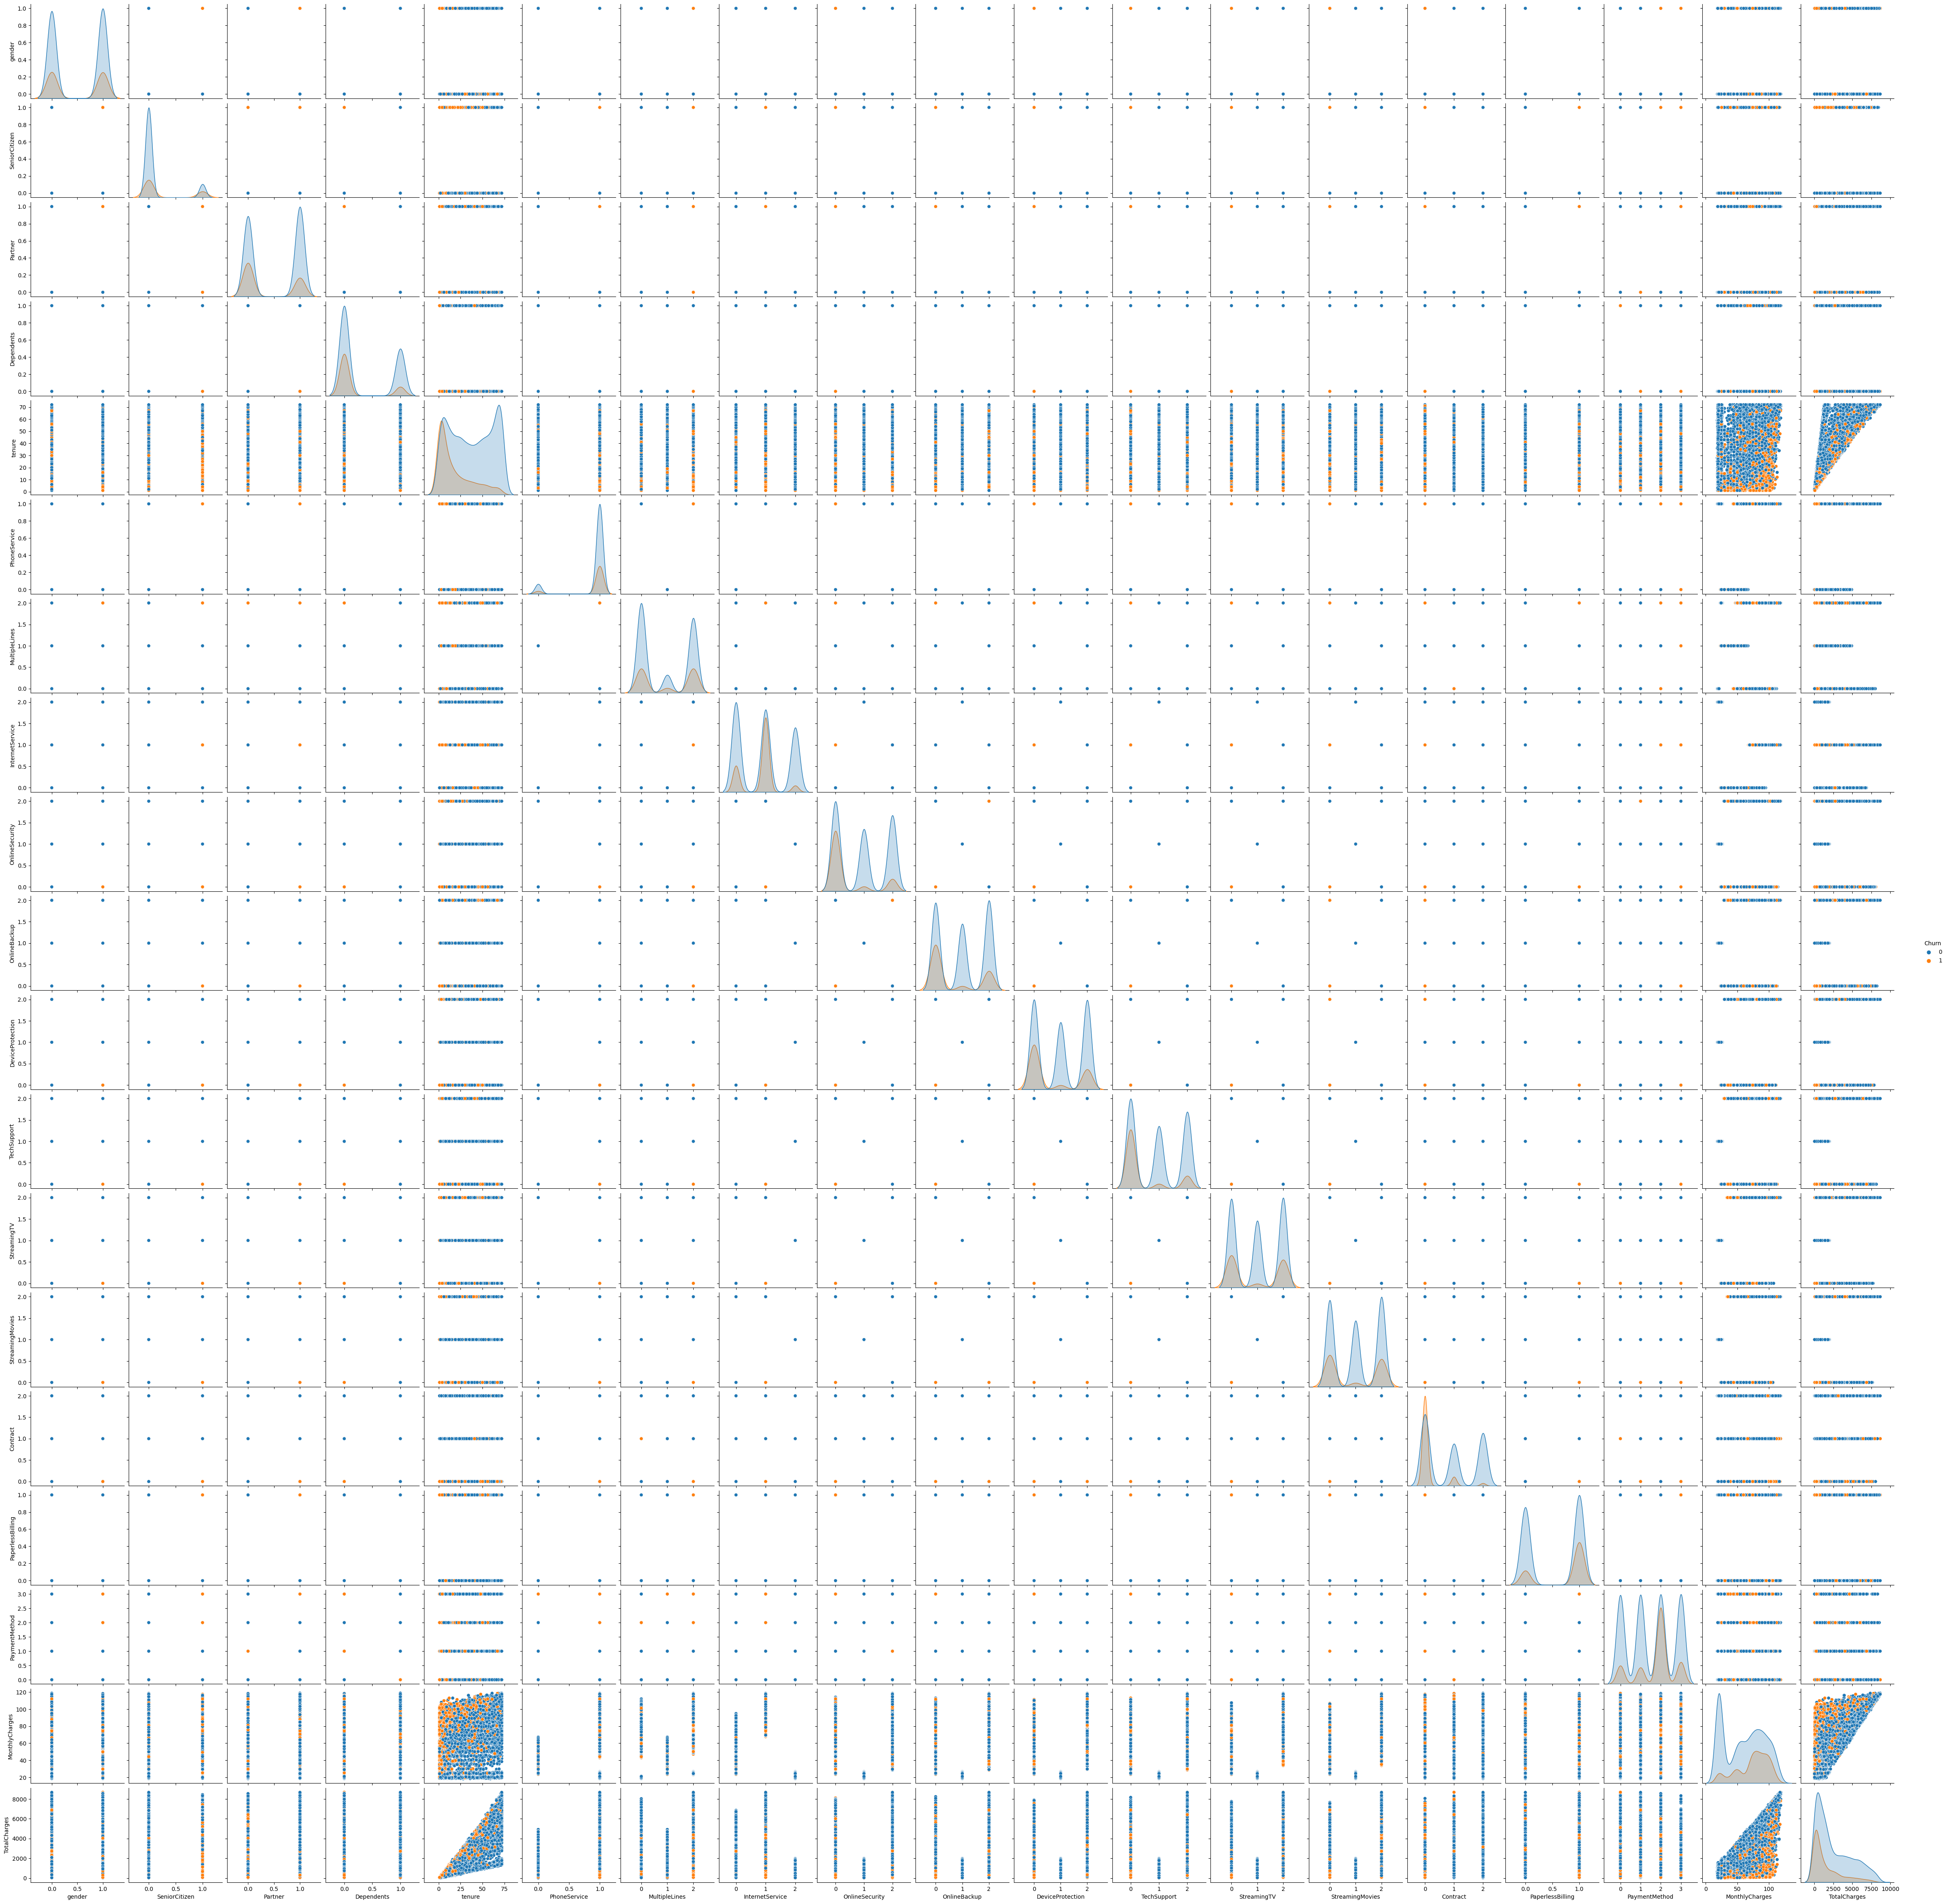

In [332]:
#see the corelation of data, totalcharges is related to montlycharges, tenure and total charges, tenure and montly charges
plt.figure(figsize=(12, 8))
sns.pairplot(data=data, diag_kind="kde", hue='Churn')
plt.show()

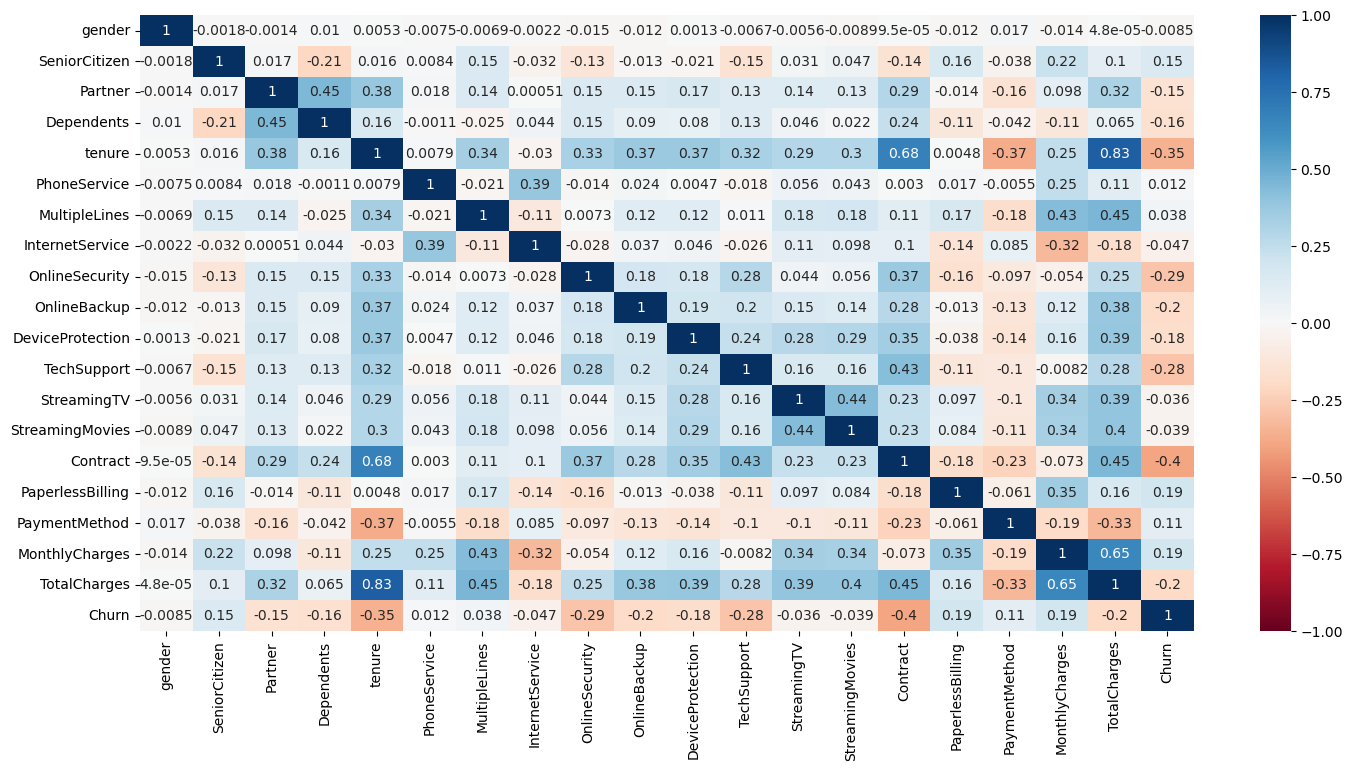

In [333]:
plt.figure(figsize=(17, 8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

# 4. Model Generation (30 points): 
Create your model and describe the algorithm that you use. Explain why you chose this model

we use: 
1. Logistic Regression
2. KNN Euclidean
3. Random Tree

Because these 3 model algorithm can predict a classification problem so, we can predict whether a  customer will churn or not using these model

# Logistic Regression

In [334]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_trainsc, y_train)

LogisticRegression(random_state=16)

In [335]:
# Make y prediction based on X test
y_pred = logreg.predict (X_testsc)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [336]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Identifying TP, TN, FP, and FN
cmlogreg = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmlogreg)
# Display the accuracy score
accuracylogreg = accuracy_score (y_test, y_pred)
print("Accuracy Score: {:0.3f}". format (accuracylogreg))

Confusion Matrix
 [[1182  129]
 [ 210  237]]
Accuracy Score: 0.807


Text(0.5, 427.9555555555555, 'Predicted label')

<Figure size 1000x800 with 0 Axes>

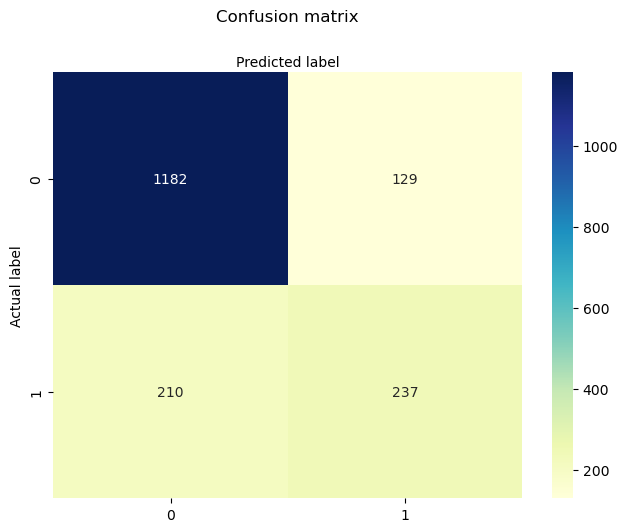

In [337]:
# Munculkan heatmap dari matriks confusion
plt.figure(figsize=(10, 8))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmlogreg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [338]:
from sklearn.metrics import classification_report
target_names = ['not churn', 'churn']
reportlogreg = classification_report(y_test, y_pred, target_names=target_names)
print(reportlogreg)

              precision    recall  f1-score   support

   not churn       0.85      0.90      0.87      1311
       churn       0.65      0.53      0.58       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



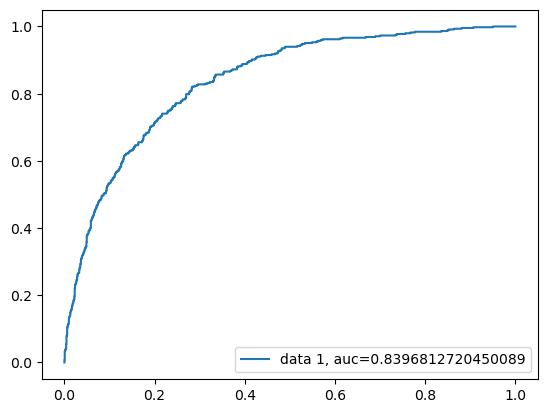

In [339]:
# import the metrics class
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_testsc)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auclogreg = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auclogreg))
plt.legend(loc=4)
plt.show()

In [340]:
from sklearn.metrics import log_loss
loglosslogreg = log_loss(y_test, logreg.predict_proba(X_testsc))
loglosslogreg
#the lower the better 
# Log Loss around "0.5" considered the classification model reasonable enough

0.41788779683675226

# KNeighbors Classifier

find the best n neighbor value for euclidean using loop

In [341]:
from sklearn.neighbors import KNeighborsClassifier
#attempt at finding the best n neighbor value for euclidean using loop
# Define the range of n_ neighbors values
n_neighbors_values = range(1, 100)

# Create empty lists to store accuracy scores and n_ neighbors values
accuracy_scores = []
n_neighbors_values_list = []
highest_accuracy = 0.0

# Iterate over the n_ neighbors values
for n_neighbors in n_neighbors_values:
# Create the K-NN classifier
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric = "euclidean", p=2)
    knnclass = classifier.fit(X_trainsc, y_train)
# Make predictions on the test set
    y_pred = classifier.predict(X_testsc)
# Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
# Append accuracy score and n_neighbors value to the respective lists
    accuracy_scores.append(accuracy)
    n_neighbors_values_list.append(n_neighbors)
#find highest accuracy 
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_n_neighbors = n_neighbors

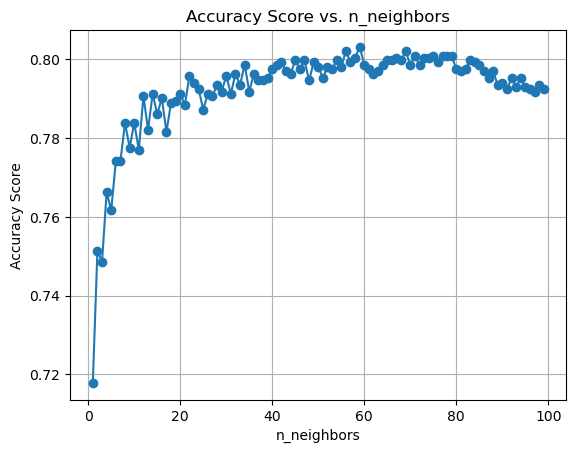

Highest Accuracy Score: 0.803 (n_neighbors=59)


In [342]:
# Create the plot
plt.plot(n_neighbors_values_list, accuracy_scores, marker='o') 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. n_neighbors')
plt.grid(True)
plt.show()
print ("Highest Accuracy Score: {:.3f} (n_neighbors={})".format(highest_accuracy, best_n_neighbors))

In [343]:
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of the KNN model
knnclassifier = KNeighborsClassifier(n_neighbors = best_n_neighbors, metric = "euclidean", p = 2)
knnclassifier.fit(X_trainsc, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=59)

In [344]:
y_pred = knnclassifier.predict(X_testsc)
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,0,1
7,1,1
8,0,0
9,0,0


In [345]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Identifying TP, TN, FP, and FN
cmknn = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmknn)
# Display the accuracy score
accuracyknn = accuracy_score (y_test, y_pred)
print("Accuracy Score: {:0.3f}". format (accuracyknn))

Confusion Matrix
 [[1153  158]
 [ 188  259]]
Accuracy Score: 0.803


Text(0.5, 427.9555555555555, 'Predicted label')

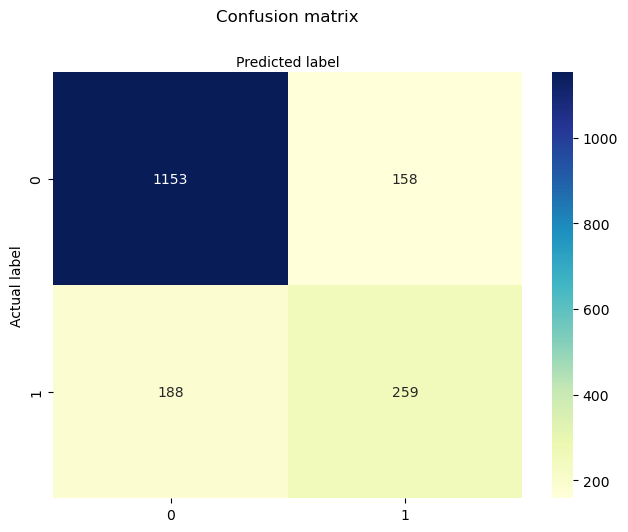

In [346]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmknn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [347]:
from sklearn.metrics import classification_report
target_names = ['not churn', 'churn']
reportknn = classification_report(y_test, y_pred, target_names=target_names)
print(reportknn)

              precision    recall  f1-score   support

   not churn       0.86      0.88      0.87      1311
       churn       0.62      0.58      0.60       447

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.73      1758
weighted avg       0.80      0.80      0.80      1758



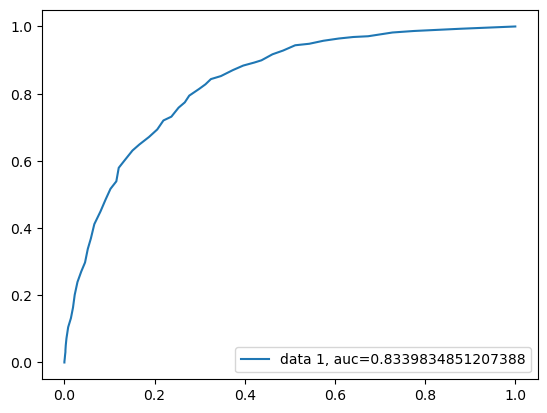

In [348]:
# import the metrics class
from sklearn import metrics
y_pred_proba = knnclassifier.predict_proba(X_testsc)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(aucknn))
plt.legend(loc=4)
plt.show()

In [349]:
from sklearn.metrics import log_loss
loglossknn = log_loss(y_test, knnclassifier.predict_proba(X_testsc))
loglossknn
#the lower the better 
# Log Loss around "0.5" considered the classification model reasonable enough

0.4803051421094284

# Random Forest Classifier

In [350]:
from sklearn.ensemble import RandomForestClassifier
# Create an instance of the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_trainrf, y_train)

RandomForestClassifier(random_state=42)

In [351]:
y_pred = rf_classifier.predict(X_testrf)
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [352]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Identifying TP, TN, FP, and FN
cmrf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmrf)
# Display the accuracy score
accuracyrf = accuracy_score (y_test, y_pred) 
print("Accuracy Score: {:0.3f}". format (accuracyrf))

Confusion Matrix
 [[1173  138]
 [ 234  213]]
Accuracy Score: 0.788


Text(0.5, 427.9555555555555, 'Predicted label')

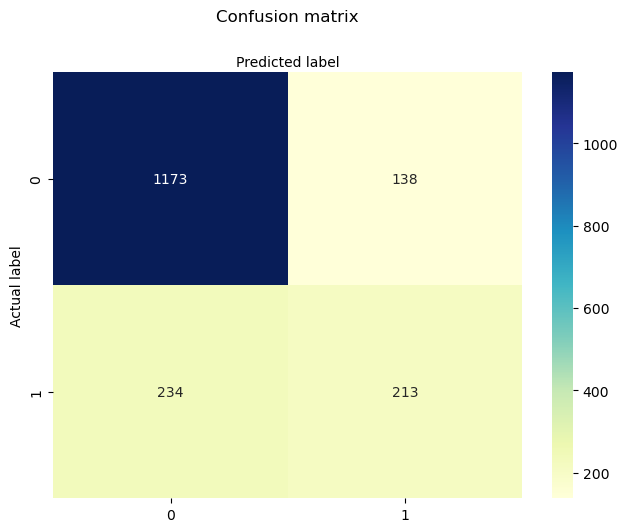

In [353]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmrf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [354]:
from sklearn.metrics import classification_report
target_names = ['not churn', 'churn']
reportrf = classification_report(y_test, y_pred, target_names=target_names)
print(reportrf)

              precision    recall  f1-score   support

   not churn       0.83      0.89      0.86      1311
       churn       0.61      0.48      0.53       447

    accuracy                           0.79      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758



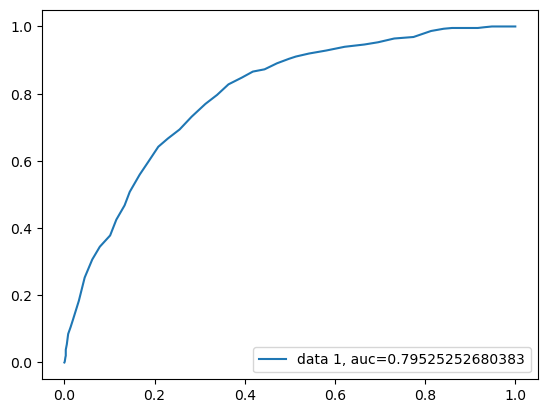

In [355]:
# import the metrics class
from sklearn import metrics
y_pred_proba = knnclassifier.predict_proba(X_testrf)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
aucrf = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(aucrf))
plt.legend(loc=4)
plt.show()

In [356]:
from sklearn.metrics import log_loss
loglossrf = log_loss(y_test, rf_classifier.predict_proba(X_testrf))
loglossrf
#the lower the better 
# Log Loss around "0.5" considered the classification model reasonable enough
# Using log_loss from scikit-learn, calculate the log loss.
# We use predict_proba to return the probability of being in the positive class for our test set.

0.4685848832216392

# 5. Model Evaluation (20 points): 
Explain the results of your model

In [357]:
print("Accuracy Score: ")
print("Logistic Regression             KNN                 Random Forest")
print(accuracylogreg, "   ",accuracyknn, "   ", accuracyrf)
print()
print("Logloss Score: ")
print("Logistic Regression             KNN                Random Forest")
print(loglosslogreg ,"  " ,loglossknn , "  " , loglossrf )
print()
print("AUC Score: ")
print("Logistic Regression             KNN                Random Forest")
print(auclogreg ,"   " ,aucknn , "    " , aucrf )

Accuracy Score: 
Logistic Regression             KNN                 Random Forest
0.8071672354948806     0.8031854379977247     0.78839590443686

Logloss Score: 
Logistic Regression             KNN                Random Forest
0.41788779683675226    0.4803051421094284    0.4685848832216392

AUC Score: 
Logistic Regression             KNN                Random Forest
0.8396812720450089     0.8339834851207388      0.79525252680383


In [358]:
print("F1 Score: ")
print("Logistic Regression------------------------------")
print(reportlogreg)

F1 Score: 
Logistic Regression------------------------------
              precision    recall  f1-score   support

   not churn       0.85      0.90      0.87      1311
       churn       0.65      0.53      0.58       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



In [359]:
print("KNN----------------------------------------------")
print(reportknn)

KNN----------------------------------------------
              precision    recall  f1-score   support

   not churn       0.86      0.88      0.87      1311
       churn       0.62      0.58      0.60       447

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.73      1758
weighted avg       0.80      0.80      0.80      1758



In [360]:
print("Random Forest------------------------------------")
print(reportrf)

Random Forest------------------------------------
              precision    recall  f1-score   support

   not churn       0.83      0.89      0.86      1311
       churn       0.61      0.48      0.53       447

    accuracy                           0.79      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758



# So, based from the result we use LOGISTIC REGRESSION because the results are better from this model algorithm compare to others

In [361]:
#the result of logistic regresion are: 
print("Accuracy Score: ")
print("Logistic Regression")
print(accuracylogreg)
print()
print("Logloss Score: ")
print("Logistic Regression")
print(loglosslogreg)
print()
print("F1 Score: ")
print("Logistic Regression------------------------------")
print(reportlogreg)
print("AUC Score: ")
print("Logistic Regression------------------------------")
print(auclogreg)

Accuracy Score: 
Logistic Regression
0.8071672354948806

Logloss Score: 
Logistic Regression
0.41788779683675226

F1 Score: 
Logistic Regression------------------------------
              precision    recall  f1-score   support

   not churn       0.85      0.90      0.87      1311
       churn       0.65      0.53      0.58       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758

AUC Score: 
Logistic Regression------------------------------
0.8396812720450089
